<a href="https://colab.research.google.com/github/QQmberling/neural-networkLOTR/blob/main/TheNewOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-resize-image

In [ ]:
import zipfile
from google.colab import output
from google.colab import drive
import os
import cv2 as cv
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation
from keras.layers import MaxPooling2D, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
from resizeimage import resizeimage
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools
import random
from sklearn.preprocessing import MinMaxScaler
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import model_from_yaml
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
DATASET_PATH = '/content/gdrive/My Drive/Dataset.zip'
zip_object = zipfile.ZipFile(file = DATASET_PATH,mode = 'r')
zip_object.extractall('./Dataset')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/My Drive/Dataset.zip' mode='r'>>

In [ ]:
DATASET = 'Dataset/'
IMAGE_HEIGHT = 180
IMAGE_WIDTH = 320
epochs = 100
batch_size = 20
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
#input_shape = (180, 320, 3)
print(input_shape[:2])

(320, 180)


In [ ]:
def create_dataset(DATASET_PATH):
    img_data_array = []
    class_name = []
   
    for directory in os.listdir(DATASET_PATH):
        for file in os.listdir(os.path.join(DATASET_PATH, directory)):
            image_path = os.path.join(DATASET_PATH, directory, file)
            image = cv.imread(image_path, cv.COLOR_BGR2RGB)
            image = cv.resize(image, input_shape[:2], interpolation = cv.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(directory)

    return img_data_array, class_name

DATA_IMAGES, DATA_LABELS = create_dataset(DATASET)
print(DATA_IMAGES[0].shape)
#print(DATA_LABELS)

(180, 320, 3)


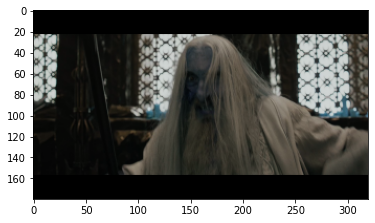

In [ ]:
im=DATA_IMAGES[0]
plt.imshow(im)

In [ ]:
target_dict = {k: v for v, k in enumerate(np.unique(DATA_LABELS))}
print(target_dict, 'target_dict')
DATA_LABELS = [target_dict[DATA_LABELS[i]] for i in range(len(DATA_LABELS))]

DATA_IMAGES = np.array(DATA_IMAGES)
DATA_LABELS = np.array(DATA_LABELS)
# img = DATA_IMAGES[300]
# r, g, b = cv.split(img)
# img = np.dstack((b,g,r))
# plt.figure(figsize=(20, 20))
# plt.imshow(img)
# plt.show()

{'gandalfs': 0, 'sarumans': 1} target_dict


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(DATA_IMAGES,
                                                    DATA_LABELS,
                                                    test_size = 0.3,
                                                    random_state = 41)
val = (X_test, y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 1, activation = 'sigmoid'))

adam = Adam(learning_rate = 0.0001)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
start_time = time.clock()

model.fit(x = X_train, y = y_train, validation_data=val, epochs = epochs, batch_size=batch_size)

end_time = time.clock()

print(end_time - start_time, 'seconds')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


11/11 [==============================] - 29s 3s/step - loss: 0.8466 - accuracy: 0.6792 - val_loss: 0.6959 - val_accuracy: 0.5326
Epoch 2/100
11/11 [==============================] - 28s 3s/step - loss: 0.1666 - accuracy: 0.9245 - val_loss: 0.7651 - val_accuracy: 0.5326
Epoch 3/100
11/11 [==============================] - 28s 3s/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.9604 - val_accuracy: 0.5326
Epoch 4/100
11/11 [==============================] - 28s 3s/step - loss: 0.0183 - accuracy: 0.9953 - val_loss: 1.2179 - val_accuracy: 0.5326
Epoch 5/100
11/11 [==============================] - 28s 3s/step - loss: 0.0135 - accuracy: 0.9953 - val_loss: 1.3724 - val_accuracy: 0.5326
Epoch 6/100
11/11 [==============================] - 31s 3s/step - loss: 0.0126 - accuracy: 0.9953 - val_loss: 1.3877 - val_accuracy: 0.5326
Epoch 7/100
11/11 [==============================] - 29s 3s/step - loss: 0.0217 - accuracy: 0.9953 - val_loss: 1.5566 - val_accuracy: 0.5326
Epoch 8/100
11/11 [======

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6066447496414185 / Test accuracy: 0.9130434989929199


41
43
НС сказала, что gandalf это saruman
НС сказала, что saruman это gandalf
НС сказала, что saruman это gandalf
НС сказала, что gandalf это saruman
НС сказала, что gandalf это saruman
НС сказала, что saruman это gandalf
НС сказала, что saruman это gandalf
НС сказала, что saruman это gandalf


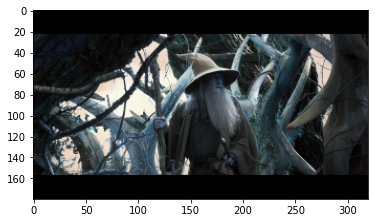

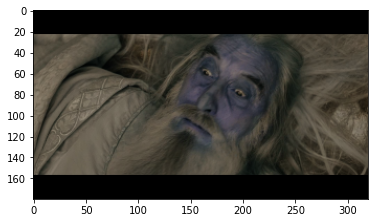

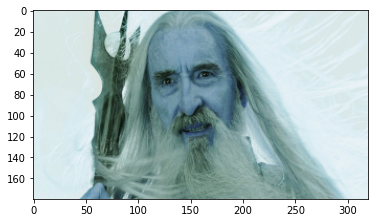

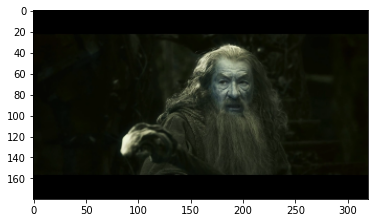

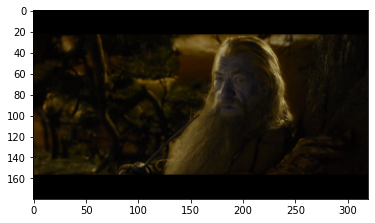

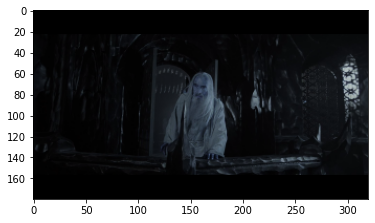

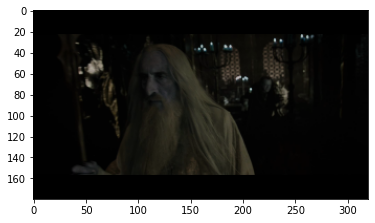

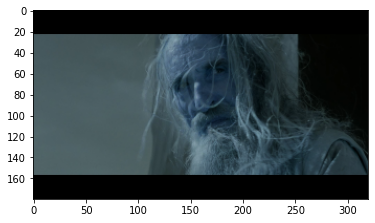

In [ ]:
use_samples = [i for i in range(len(X_test))]
samples_to_predict = []

for sample in use_samples:
  # Generate a plot
  x = X_test[sample]
  # plt.imshow(x)
  # plt.show()
  samples_to_predict.append(x)

samples_to_predict = np.array(samples_to_predict)
predictions = model.predict(samples_to_predict)
classes = np.round(predictions, 0)


print(list(classes).count(1))
print(list(y_test).count(1))
dicti = {1: 'saruman', 0: 'gandalf'}

for i, el in enumerate(classes):
  if y_test[i] != el:
    print(f'НС сказала, что {dicti[int(y_test[i])]} это {dicti[int(el)]}')
    plt.figure()
    plt.imshow(X_test[i])


In [ ]:
from tensorflow.keras.models import save_model, load_model
filepath = '/content/gdrive/My Drive/11'
save_model(model, filepath)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/11/assets


In [ ]:
model2 = load_model(filepath, compile = True)

use_samples = [i for i in range(len(X_test))]
samples_to_predict = []

for sample in use_samples:
  # Generate a plot
  x = X_test[sample]
  # plt.imshow(x)
  # plt.show()
  samples_to_predict.append(x)

samples_to_predict = np.array(samples_to_predict)
predictions = model2.predict(samples_to_predict)
classes = np.round(predictions, 0)
classes

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],